**MULTILINEAR REGRESSION**

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import numpy as np

In [254]:
# Download the dataset
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2021-08-24 06:24:22--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.002s  

2021-08-24 06:24:22 (29.3 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [255]:
df=pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Predicting the CO2EMISSION using 
FUELCONSUMPTION_COMB_MPG

In [256]:
x=df[['ENGINESIZE']]

x.head()

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5


In [257]:
y=df['CO2EMISSIONS']
y.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2EMISSIONS, dtype: int64

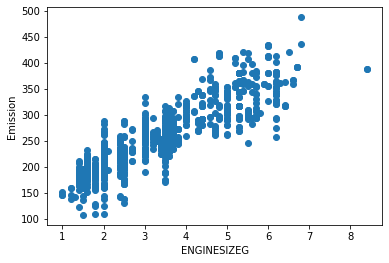

In [258]:
# Let's plot Emission values with respect to ENGINESIZE:
plt.scatter(x['ENGINESIZE'],y)
plt.xlabel("ENGINESIZEG")
plt.ylabel("Emission")
plt.show()

In [259]:
# Using sklearn library, making train data,test data
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3)

print("x_train size",x_train.shape)
print("y_train size",y_train.shape)

x_train size (746, 1)
y_train size (746,)


In [260]:
print("x_test size",x_test.shape)
print("y_test size",y_test.shape)

x_test size (321, 1)
y_test size (321,)


In [261]:
x_train.values
x_test.values
y_train.values
y_test.values;

In [262]:
#using Linear Regression algorithm
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
yhat=lm.predict(x_test)

In [263]:
print("Predicted values: ",yhat[0:5])
print("y_test values: ",y_test[0:5].values)

Predicted values:  [221.66508493 253.48023651 249.50334256 221.66508493 333.01811546]
y_test values:  [288 258 242 225 366]


In [264]:
#Finding intercept and coefficients 
print("intercept: ",lm.intercept_)
print("Coefficients: ",lm.coef_)

intercept:  122.24273623140158
Coefficients:  [39.76893948]


In [265]:
#Accuracy (R2 score)
lm.score(x_test,yhat)

1.0

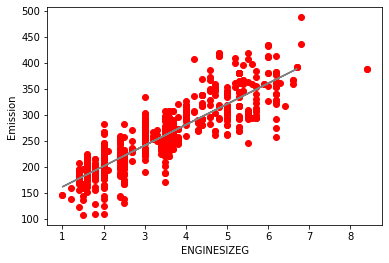

In [266]:
plt.scatter(x_train,y_train,color='r')
plt.plot(x_test,yhat,color='grey')
plt.xlabel("ENGINESIZEG")
plt.ylabel("Emission")
plt.show()


**POLYNOMIAL REGRESSION**

In [267]:
X=df[['ENGINESIZE']]
Y=df[['CO2EMISSIONS']]

In [268]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.3)

print("x_train size",X_train.shape)
print("y_train size",Y_train.shape)

x_train size (746, 1)
y_train size (746, 1)


In [269]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
X_train = np.asanyarray(X_train)
Y_train = np.asanyarray(Y_train)

X_test = np.asanyarray(X_test)
Y_test= np.asanyarray(Y_test)

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(X_train)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  5.  , 25.  ],
       [ 1.  ,  3.  ,  9.  ],
       ...,
       [ 1.  ,  1.6 ,  2.56],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  5.3 , 28.09]])

In [270]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, Y_train)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         52.63286644 -1.72116441]]
Intercept:  [102.81694519]


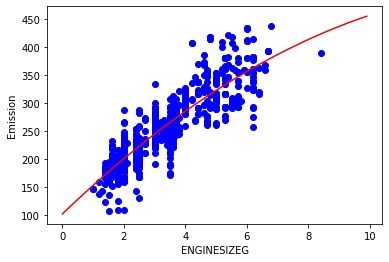

In [271]:
plt.scatter(X_train, Y_train,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("ENGINESIZEG")
plt.ylabel("Emission")
plt.show()